<a href="https://colab.research.google.com/github/bethinaveen23/AIML-2303A52093/blob/main/AIML_Lab_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AIML LAB EXTERNAL (2024 – 25)

SET – 2 (Logistic Regression)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("/content/bd_students_per.csv")
df.head()

,id,full_name,age,gender,location,family_size,mother_education,father_education,mother_job,father_job,...,tutoring,school_type,attendance,extra_curricular_activities,english,math,science,social_science,art_culture,stu_group
0,2,Avi Biswas,16,Male,Urban,6,SSC,HSC,No,No,...,Yes,Private,95,Yes,95,98,92,94,98,Science
1,3,Taslima Sultana,18,Female,Rural,6,SSC,HSC,No,Yes,...,No,Semi_Govt,92,No,65,71,40,78,80,Commerce
2,4,Md Adilur Rahman,15,Male,Rural,4,SSC,SSC,Yes,Yes,...,Yes,Govt,81,Yes,64,78,58,86,74,Commerce
3,5,Saleh Ahmed,16,Male,Rural,6,SSC,SSC,Yes,Yes,...,Yes,Private,90,Yes,84,90,85,86,88,Science
4,6,Din Islam,17,Male,Urban,5,Honors,Masters,No,Yes,...,Yes,Semi_Govt,75,Yes,54,70,45,79,76,Commerce


In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8612 entries, 0 to 8611
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           8612 non-null   int64 
 1   full_name                    8612 non-null   object
 2   age                          8612 non-null   int64 
 3   gender                       8612 non-null   object
 4   location                     8611 non-null   object
 5   family_size                  8612 non-null   int64 
 6   mother_education             8602 non-null   object
 7   father_education             8608 non-null   object
 8   mother_job                   8612 non-null   object
 9   father_job                   8612 non-null   object
 10  guardian                     8612 non-null   object
 11  parental_involvement         8612 non-null   object
 12  internet_access              8612 non-null   object
 13  studytime                    8612

In [5]:
df.drop(['age','gender','location','family_size','mother_education','father_education','mother_job','father_job'],axis=1,inplace=True)

In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8612 entries, 0 to 8611
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           8612 non-null   int64 
 1   full_name                    8612 non-null   object
 2   guardian                     8612 non-null   object
 3   parental_involvement         8612 non-null   object
 4   internet_access              8612 non-null   object
 5   studytime                    8612 non-null   int64 
 6   tutoring                     8612 non-null   object
 7   school_type                  8612 non-null   object
 8   attendance                   8612 non-null   int64 
 9   extra_curricular_activities  8612 non-null   object
 10  english                      8612 non-null   int64 
 11  math                         8612 non-null   int64 
 12  science                      8612 non-null   int64 
 13  social_science               8612

In [7]:
print(df.columns)
df['stu_group'].replace(['Science', 'Commerce','Arts','science','commerce','arts'], [1, 2, 3, 1, 2, 3], inplace=True)

Index(['id', 'full_name', 'guardian', 'parental_involvement',
       'internet_access', 'studytime', 'tutoring', 'school_type', 'attendance',
       'extra_curricular_activities', 'english', 'math', 'science',
       'social_science', 'art_culture', 'stu_group'],
      dtype='object')


<ipython-input-7-708df3162be5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['stu_group'].replace(['Science', 'Commerce','Arts','science','commerce','arts'], [1, 2, 3, 1, 2, 3], inplace=True)
<ipython-input-7-708df3162be5>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['stu_group'].replac

In [8]:
print(df['stu_group'].unique())

[1 2 3]


In [9]:
df

,id,full_name,guardian,parental_involvement,internet_access,studytime,tutoring,school_type,attendance,extra_curricular_activities,english,math,science,social_science,art_culture,stu_group
0,2,Avi Biswas,Father,Yes,Yes,8,Yes,Private,95,Yes,95,98,92,94,98,1
1,3,Taslima Sultana,Father,Yes,No,4,No,Semi_Govt,92,No,65,71,40,78,80,2
2,4,Md Adilur Rahman,Father,Yes,Yes,5,Yes,Govt,81,Yes,64,78,58,86,74,2
3,5,Saleh Ahmed,Father,Yes,Yes,7,Yes,Private,90,Yes,84,90,85,86,88,1
4,6,Din Islam,Father,Yes,Yes,4,Yes,Semi_Govt,75,Yes,54,70,45,79,76,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8607,8609,Elina Khanam,Mother,No,Yes,7,No,Govt,78,Yes,81,83,80,84,91,1
8608,8610,Sadiq Ghosh,Other,No,Yes,7,No,Private,73,No,95,100,96,98,98,1
8609,8611,Arman Amin,Other,Yes,Yes,1,Yes,Private,51,No,45,59,41,51,69,3
8610,8612,Tawhidul Saif,Other,Yes,Yes,1,No,Private,66,Yes,59,65,60,68,69,3


In [10]:
df.drop(['full_name','guardian','parental_involvement','internet_access','tutoring','school_type','extra_curricular_activities'],axis=1,inplace=True)

In [11]:
df

,id,studytime,attendance,english,math,science,social_science,art_culture,stu_group
0,2,8,95,95,98,92,94,98,1
1,3,4,92,65,71,40,78,80,2
2,4,5,81,64,78,58,86,74,2
3,5,7,90,84,90,85,86,88,1
4,6,4,75,54,70,45,79,76,2
...,...,...,...,...,...,...,...,...,...
8607,8609,7,78,81,83,80,84,91,1
8608,8610,7,73,95,100,96,98,98,1
8609,8611,1,51,45,59,41,51,69,3
8610,8612,1,66,59,65,60,68,69,3


 Implement logistic regression on a binary classification dataset.

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x=df.drop('stu_group',axis=1)
x

,id,studytime,attendance,english,math,science,social_science,art_culture
0,2,8,95,95,98,92,94,98
1,3,4,92,65,71,40,78,80
2,4,5,81,64,78,58,86,74
3,5,7,90,84,90,85,86,88
4,6,4,75,54,70,45,79,76
...,...,...,...,...,...,...,...,...
8607,8609,7,78,81,83,80,84,91
8608,8610,7,73,95,100,96,98,98
8609,8611,1,51,45,59,41,51,69
8610,8612,1,66,59,65,60,68,69


In [14]:
y=df['stu_group']
y

,stu_group
0,1
1,2
2,2
3,1
4,2
...,...
8607,1
8608,1
8609,3
8610,3


In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [17]:
model_lr=LogisticRegression(max_iter=100)

In [18]:
model_lr.fit(x_train,y_train)
y_pred=model_lr.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.5615325077399381


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Calculate and interpret the confusion matrix.

In [19]:
from sklearn.datasets import load_iris

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [21]:
iris = load_iris()
X = iris.data
y = iris.target

In [22]:
binary_mask = (y != 0)
X = X[binary_mask]
y = y[binary_mask]
y = (y == 1).astype(int)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [25]:
y_pred = clf.predict(X_test)

In [26]:
cm = confusion_matrix(y_test, y_pred)

Classification Report:
               precision    recall  f1-score   support

   Virginica       0.92      0.92      0.92        13
  Versicolor       0.94      0.94      0.94        17

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



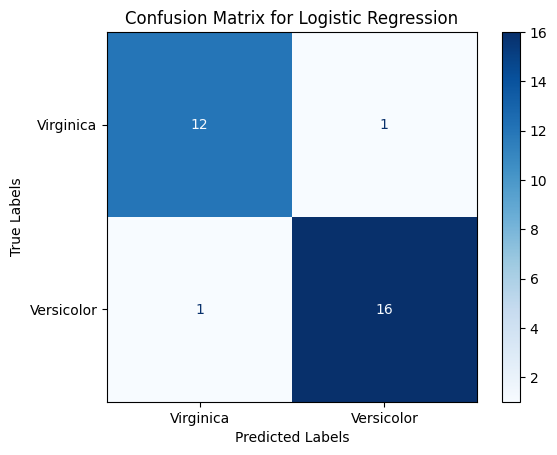

In [27]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Virginica", "Versicolor"])
disp.plot(cmap='Blues')
disp.ax_.set_title("Confusion Matrix for Logistic Regression")
disp.ax_.set_xlabel("Predicted Labels")
disp.ax_.set_ylabel("True Labels")
disp.ax_.grid(False)
report = classification_report(y_test, y_pred, target_names=["Virginica", "Versicolor"])
print("Classification Report:\n", report)

Evaluate the model using accuracy and F1-score.

In [28]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [31]:
iris = load_iris()
X = iris.data
y = iris.target

In [32]:
binary_mask = (y != 0)  # Only versicolor (1) and virginica (2)
X = X[binary_mask]
y = y[binary_mask]
y = (y == 1).astype(int)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Remove stratify=y

In [35]:
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [36]:
y_pred = clf.predict(X_test)

In [37]:
accuracy = accuracy_score(y_test, y_pred)

In [38]:
f1 = f1_score(y_test, y_pred)

Accuracy: 0.93
F1-Score: 0.94

Classification Report:
              precision    recall  f1-score   support

   Virginica       0.92      0.92      0.92        13
  Versicolor       0.94      0.94      0.94        17

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



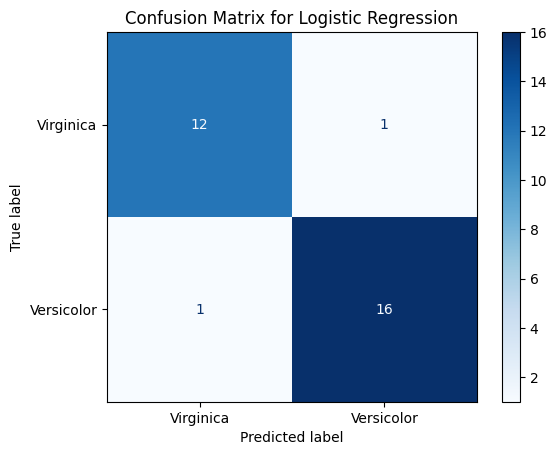

In [39]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Virginica", "Versicolor"])
disp.plot(cmap='Blues')
disp.ax_.set_title("Confusion Matrix for Logistic Regression")
disp.ax_.grid(False)
print(f"Accuracy: {accuracy:.2f}")
print(f"F1-Score: {f1:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Virginica", "Versicolor"]))

Visualize the decision boundary of the logistic regression model.

In [40]:
iris = load_iris()
X = iris.data[:, :2]
y = (iris.target != 0).astype(int)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [43]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min, y_max, 0.01))

In [44]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

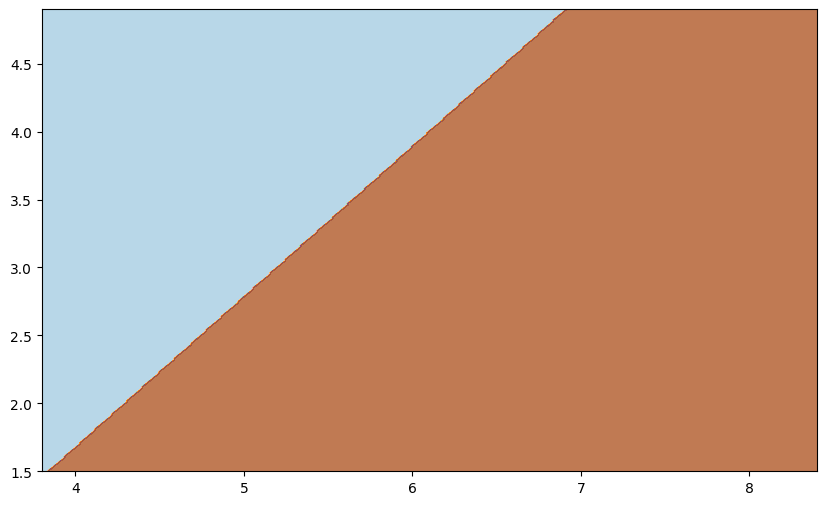

In [45]:
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

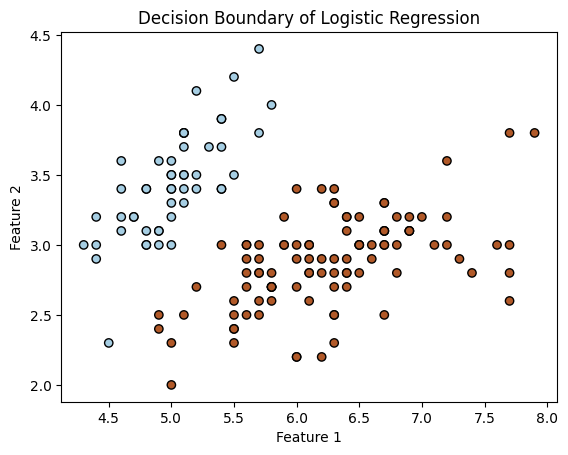

In [46]:
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=plt.cm.Paired)
plt.title("Decision Boundary of Logistic Regression")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

Implement regularization (L1 or L2) and evaluate the model performance.

In [47]:
iris = load_iris()
X = iris.data
y = (iris.target != 0).astype(int)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [49]:
clf_l2 = LogisticRegression(penalty='l2', solver='lbfgs', random_state=42, max_iter=1000)
clf_l2.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [50]:
clf_l1 = LogisticRegression(penalty='l1', solver='liblinear', random_state=42, max_iter=1000)
clf_l1.fit(X_train, y_train)

LogisticRegression(max_iter=1000, penalty='l1', random_state=42,
                   solver='liblinear')

In [51]:
y_pred_l2 = clf_l2.predict(X_test)
accuracy_l2 = accuracy_score(y_test, y_pred_l2)
f1_l2 = f1_score(y_test, y_pred_l2)

In [52]:
y_pred_l1 = clf_l1.predict(X_test)
accuracy_l1 = accuracy_score(y_test, y_pred_l1)
f1_l1 = f1_score(y_test, y_pred_l1)

In [53]:
print("Performance with L2 Regularization:")
print(f"Accuracy: {accuracy_l2:.2f}")
print(f"F1-Score: {f1_l2:.2f}\n")
print(classification_report(y_test, y_pred_l2))

print("Performance with L1 Regularization:")
print(f"Accuracy: {accuracy_l1:.2f}")
print(f"F1-Score: {f1_l1:.2f}\n")
print(classification_report(y_test, y_pred_l1))

Performance with L2 Regularization:
Accuracy: 1.00
F1-Score: 1.00

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        26

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Performance with L1 Regularization:
Accuracy: 1.00
F1-Score: 1.00

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        26

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

